## 東京（＋沖縄）の外国人人口の変化
MIURA Akari

In [7]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np
import matplotlib.pyplot as plt

# set font
import matplotlib as mpl

# for Mac
#mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
mpl.rc('font',family='MS Gothic')

## 境界データダウンロード
東京都は小笠原諸島まで含まれていて、データが11個ずつありましたが、確認して二つに絞れました、、、

↓いらなかった

tokyomesh1 = gpd.read_file('kyokai/SDDSWS3653.zip')
tokyomesh2 = gpd.read_file('kyokai/SDDSWS3741.zip')
tokyomesh3 = gpd.read_file('kyokai/SDDSWS3942.zip')
tokyomesh4 = gpd.read_file('kyokai/SDDSWS4042.zip')
tokyomesh5 = gpd.read_file('kyokai/SDDSWS4839.zip')
tokyomesh6 = gpd.read_file('kyokai/SDDSWS4939.zip')
tokyomesh7 = gpd.read_file('kyokai/SDDSWS5039.zip')
tokyomesh8 = gpd.read_file('kyokai/SDDSWS5139.zip')
tokyomesh9 = gpd.read_file('kyokai/SDDSWS5239.zip')

In [12]:
tokyomesh1 = gpd.read_file('data/SDDSWS5338.zip')
tokyomesh2= gpd.read_file('data/SDDSWS5339.zip')

In [9]:
# combine all four mesh shapes
tokyomesh = gpd.pd.concat([tokyomesh1,tokyomesh2])

<Axes: >

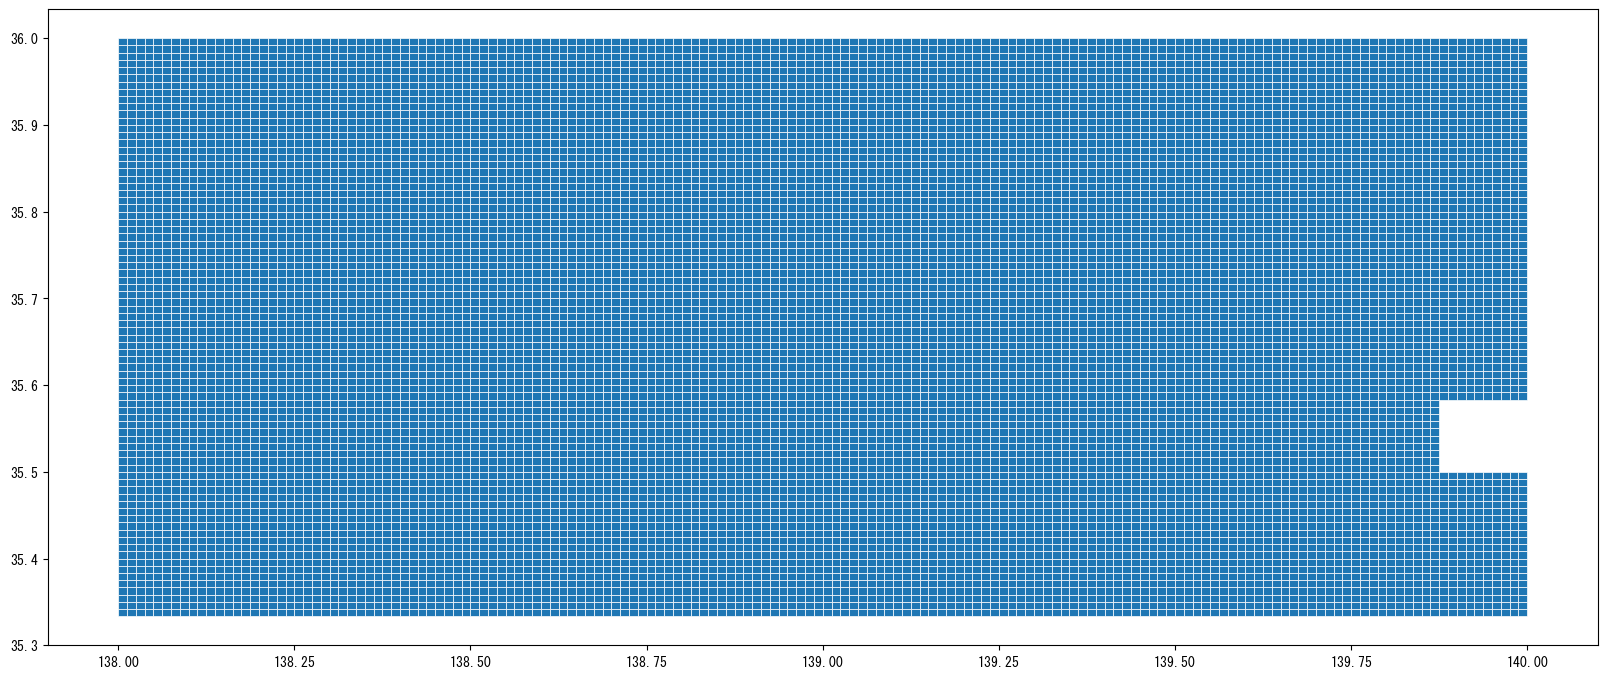

In [10]:
# quick plot
tokyomesh.plot(figsize=(20,20),edgecolor='white',linewidth=0.5)

In [11]:
tokyomesh.head()

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry
0,53380000,5338,00,00,1,"POLYGON ((138.01250 35.33333, 138.00000 35.333..."
1,53380001,5338,00,01,2,"POLYGON ((138.02500 35.33333, 138.01250 35.333..."
2,53380002,5338,00,02,3,"POLYGON ((138.03750 35.33333, 138.02500 35.333..."
3,53380003,5338,00,03,4,"POLYGON ((138.05000 35.33333, 138.03750 35.333..."
4,53380004,5338,00,04,5,"POLYGON ((138.06250 35.33333, 138.05000 35.333..."


## 2020年&2015年統計データ

In [16]:
# csvデータなので pandas (pd) でインポート
# 文字化け予防のために encoding='cp932' 
tokyodata1 = pd.read_csv('data/tblT001100S5338.zip', encoding='cp932')
tokyodata2 = pd.read_csv('data/tblT001100S5339.zip', encoding='cp932')

tokyodata3 = pd.read_csv('data/tblT000846S5338.zip', encoding='cp932')
tokyodata4 = pd.read_csv('data/tblT000846S5339.zip', encoding='cp932')

In [17]:
# 4つのテーブルから１行目を削除
tokyodata1 = tokyodata1[1:]
tokyodata2 = tokyodata2[1:]
tokyodata3 = tokyodata3[1:]
tokyodata4 = tokyodata4[1:]

In [18]:
#4つのテーブルから「＊」を非数に置き換える
tokyodata1 = tokyodata1.replace('*',np.nan)
tokyodata2 = tokyodata2.replace('*',np.nan)
tokyodata3 = tokyodata3.replace('*',np.nan)
tokyodata4 = tokyodata4.replace('*',np.nan)

In [19]:
tokyodata2020 = pd.concat([tokyodata1,tokyodata2])
tokyodata2015 = pd.concat([tokyodata3,tokyodata4])

In [20]:
tokyodata2020.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,53380060.0,1.0,NaN,53381022;53381030,8,4,4,0,0,0,...,0,0,5,5,0,0,7,0,3,4
2,53380234.0,2.0,53380275.0,NaN,2,1,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,53380244.0,2.0,53380275.0,NaN,1,0,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,53380258.0,2.0,53380275.0,NaN,1,1,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,53380265.0,2.0,53380275.0,NaN,2,0,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
tokyodata2015.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T000846001,T000846002,T000846003,T000846004,T000846005,T000846006,...,T000846032,T000846033,T000846034,T000846035,T000846036,T000846037,T000846038,T000846039,T000846040,T000846041
1,53380060.0,1.0,NaN,53380061;53380062,12,5,7,1,1,0,...,0,0,4,4,0,0,7,0,4,3
2,53380061.0,2.0,53380060.0,NaN,1,1,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,53380062.0,2.0,53380060.0,NaN,1,1,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,53380213.0,2.0,53380275.0,NaN,1,0,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,53380234.0,2.0,53380275.0,NaN,4,2,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# get rid of HTKSYORI, HTKSAKI, GASSAN
columns=['HTKSYORI', 'HTKSAKI', 'GASSAN']
tokyodata2015=tokyodata2015.drop(columns=columns)

In [23]:
columns=['HTKSYORI', 'HTKSAKI', 'GASSAN']
tokyodata2020=tokyodata2020.drop(columns=columns)

In [24]:
# combine 2015 and 2020 data
tokyodata = pd.merge(tokyodata2020,tokyodata2015,on='KEY_CODE')

In [25]:
# check data info
tokyodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6674 entries, 0 to 6673
Data columns (total 92 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    6674 non-null   float64
 1   T001100001  6674 non-null   object 
 2   T001100002  6674 non-null   object 
 3   T001100003  6674 non-null   object 
 4   T001100004  6244 non-null   object 
 5   T001100005  6244 non-null   object 
 6   T001100006  6244 non-null   object 
 7   T001100007  6244 non-null   object 
 8   T001100008  6244 non-null   object 
 9   T001100009  6244 non-null   object 
 10  T001100010  6244 non-null   object 
 11  T001100011  6244 non-null   object 
 12  T001100012  6244 non-null   object 
 13  T001100013  6244 non-null   object 
 14  T001100014  6244 non-null   object 
 15  T001100015  6244 non-null   object 
 16  T001100016  6244 non-null   object 
 17  T001100017  6244 non-null   object 
 18  T001100018  6244 non-null   object 
 19  T001100019  6244 non-null  

In [26]:
# まずはカラムをアウトプット
tokyodata.columns

Index(['KEY_CODE', 'T001100001', 'T001100002', 'T001100003', 'T001100004',
       'T001100005', 'T001100006', 'T001100007', 'T001100008', 'T001100009',
       'T001100010', 'T001100011', 'T001100012', 'T001100013', 'T001100014',
       'T001100015', 'T001100016', 'T001100017', 'T001100018', 'T001100019',
       'T001100020', 'T001100021', 'T001100022', 'T001100023', 'T001100024',
       'T001100025', 'T001100026', 'T001100027', 'T001100028', 'T001100029',
       'T001100030', 'T001100031', 'T001100032', 'T001100033', 'T001100034',
       'T001100035', 'T001100036', 'T001100037', 'T001100038', 'T001100039',
       'T001100040', 'T001100041', 'T001100042', 'T001100043', 'T001100044',
       'T001100045', 'T001100046', 'T001100047', 'T001100048', 'T001100049',
       'T001100050', 'T000846001', 'T000846002', 'T000846003', 'T000846004',
       'T000846005', 'T000846006', 'T000846007', 'T000846008', 'T000846009',
       'T000846010', 'T000846011', 'T000846012', 'T000846013', 'T000846014',
 

In [27]:
# 1番目以降をアウトプット
tokyodata.columns[1:]

Index(['T001100001', 'T001100002', 'T001100003', 'T001100004', 'T001100005',
       'T001100006', 'T001100007', 'T001100008', 'T001100009', 'T001100010',
       'T001100011', 'T001100012', 'T001100013', 'T001100014', 'T001100015',
       'T001100016', 'T001100017', 'T001100018', 'T001100019', 'T001100020',
       'T001100021', 'T001100022', 'T001100023', 'T001100024', 'T001100025',
       'T001100026', 'T001100027', 'T001100028', 'T001100029', 'T001100030',
       'T001100031', 'T001100032', 'T001100033', 'T001100034', 'T001100035',
       'T001100036', 'T001100037', 'T001100038', 'T001100039', 'T001100040',
       'T001100041', 'T001100042', 'T001100043', 'T001100044', 'T001100045',
       'T001100046', 'T001100047', 'T001100048', 'T001100049', 'T001100050',
       'T000846001', 'T000846002', 'T000846003', 'T000846004', 'T000846005',
       'T000846006', 'T000846007', 'T000846008', 'T000846009', 'T000846010',
       'T000846011', 'T000846012', 'T000846013', 'T000846014', 'T000846015',

In [28]:
# 元のデータを入れ替える
tokyodata[tokyodata.columns[1:]]=tokyodata[tokyodata.columns[1:]].astype(float)

In [31]:
tokyodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6674 entries, 0 to 6673
Data columns (total 92 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    6674 non-null   float64
 1   T001100001  6674 non-null   float64
 2   T001100002  6674 non-null   float64
 3   T001100003  6674 non-null   float64
 4   T001100004  6244 non-null   float64
 5   T001100005  6244 non-null   float64
 6   T001100006  6244 non-null   float64
 7   T001100007  6244 non-null   float64
 8   T001100008  6244 non-null   float64
 9   T001100009  6244 non-null   float64
 10  T001100010  6244 non-null   float64
 11  T001100011  6244 non-null   float64
 12  T001100012  6244 non-null   float64
 13  T001100013  6244 non-null   float64
 14  T001100014  6244 non-null   float64
 15  T001100015  6244 non-null   float64
 16  T001100016  6244 non-null   float64
 17  T001100017  6244 non-null   float64
 18  T001100018  6244 non-null   float64
 19  T001100019  6244 non-null  

## Join Mesh with Data

In [32]:
# KEY_CODEをfloatに
tokyomesh['KEY_CODE']=tokyomesh['KEY_CODE'].astype(float)

In [33]:
# merge the data
tokyomesh = tokyomesh.merge(tokyodata, on='KEY_CODE')

In [34]:
# check!
tokyomesh.sample(5)

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry,T001100001,T001100002,T001100003,T001100004,...,T000846032,T000846033,T000846034,T000846035,T000846036,T000846037,T000846038,T000846039,T000846040,T000846041
279,53381455.0,5338,14,55,1256,"POLYGON ((138.57500 35.45833, 138.56250 35.458...",1.0,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3068,53392300.0,5339,23,00,1901,"POLYGON ((139.38750 35.50000, 139.37500 35.500...",3557.0,1809.0,1748.0,484.0,...,31.0,9.0,1078.0,950.0,128.0,146.0,567.0,20.0,113.0,147.0
6227,53397341.0,5339,73,41,5842,"POLYGON ((139.40000 35.95000, 139.38750 35.950...",8396.0,4358.0,4038.0,609.0,...,26.0,10.0,1881.0,1678.0,203.0,226.0,1201.0,854.0,388.0,295.0
1130,53384424.0,5338,44,24,3625,"POLYGON ((138.56250 35.68333, 138.55000 35.683...",877.0,404.0,473.0,93.0,...,1.0,0.0,169.0,152.0,17.0,19.0,89.0,12.0,16.0,33.0
4698,53395125.0,5339,51,25,4026,"POLYGON ((139.20000 35.76667, 139.18750 35.766...",17.0,8.0,9.0,0.0,...,1.0,0.0,6.0,4.0,2.0,0.0,8.0,0.0,2.0,2.0


## Map time

In [35]:
# reproject to 3857 (web mercator)
tokyomesh = tokyomesh.to_crs(3857)

### 2020

<Axes: >

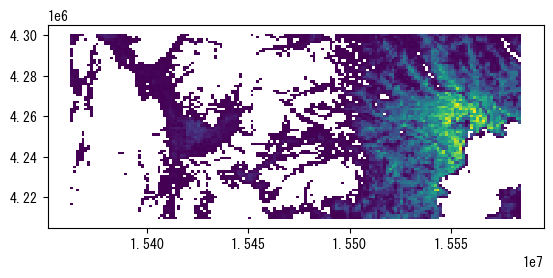

In [36]:
# make a quick plot
tokyomesh.plot(column='T001100001')

## 2015

<Axes: >

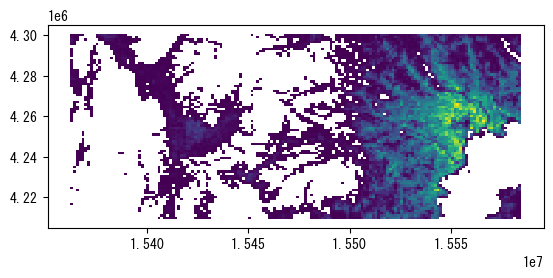

In [37]:
tokyomesh.plot(column='T000846001')

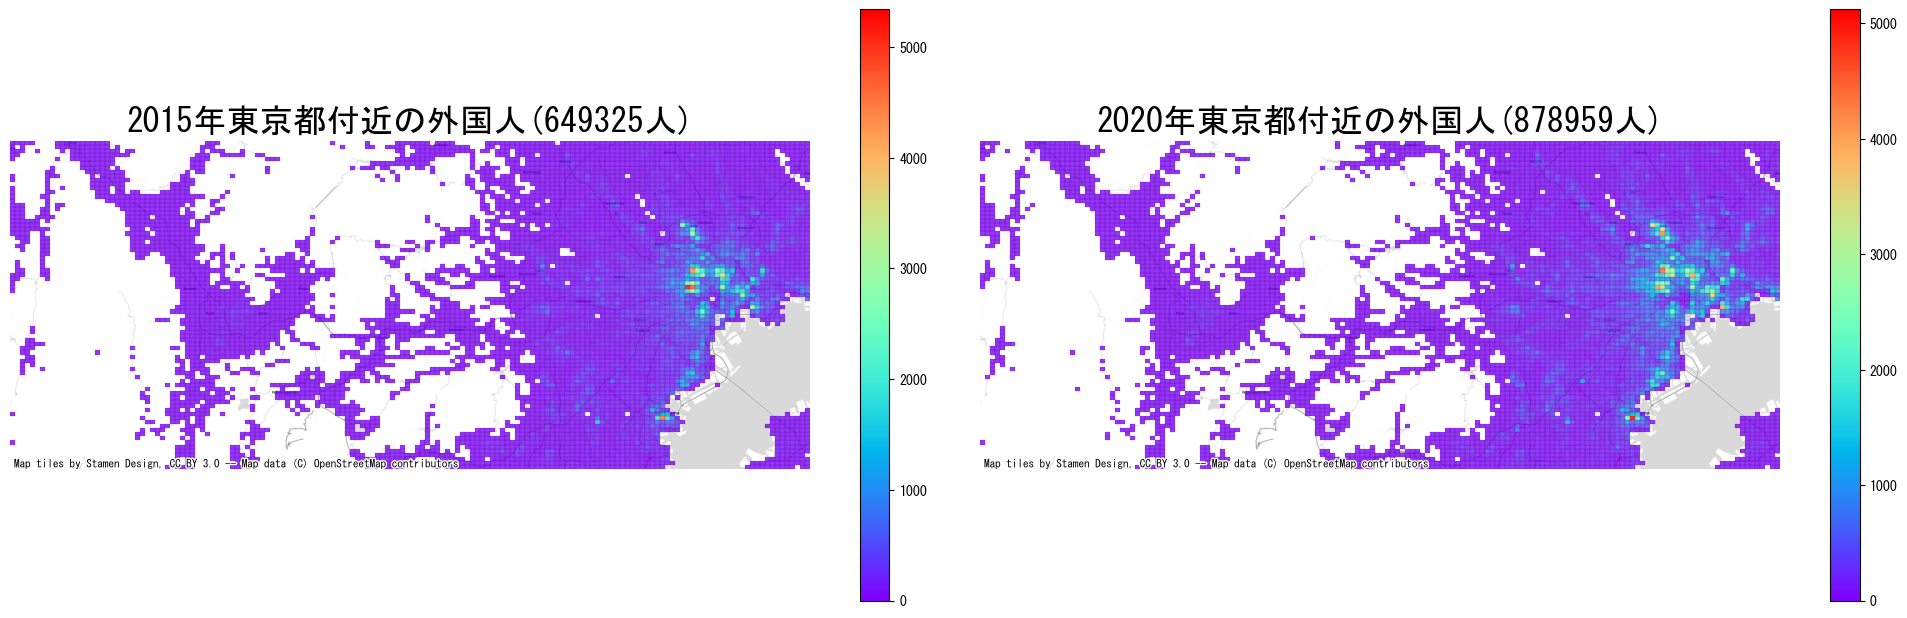

In [41]:
# population map
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,20)) # 1 row, 2 columns, side by side

# 2015 population
tokyomesh.plot(ax = ax[0], # 左のマップ
    column='T000846022',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='rainbow',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
)

# 2020 population
tokyomesh.plot(ax = ax[1], # 右のマップ
    column='T001100031',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='rainbow',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
)

# hide axes
ax[0].axis('off') # 左
ax[1].axis('off') # 右

# 列の数字の合計を計算する
sum2015 = int(tokyomesh['T000846022'].sum())
sum2020 = int(tokyomesh['T001100031'].sum())

# title
ax[0].set_title("2015年東京都付近の外国人({}人)".format(sum2015),fontsize=24); # 左
ax[1].set_title("2020年東京都付近の外国人({}人)".format(sum2020),fontsize=24); # 右

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = tokyomesh.total_bounds

# Set the plot limits based on the total bounds
ax[0].set_xlim(xmin, xmax) # 左
ax[0].set_ylim(ymin, ymax) # 左 
ax[1].set_xlim(xmin, xmax) # 右
ax[1].set_ylim(ymin, ymax) # 右

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax[0],source=cx.providers.Stamen.TonerLite) # 左
cx.add_basemap(ax[1],source=cx.providers.Stamen.TonerLite) # 右

凡例を狭めてみたり、ほかの都道府県と並べてマップを表示して完成。